# Feature Engineering

In [1]:
import os

from src.config import Config
from src.data import load_prices_sentiment
from src.features import create_features_and_target
from src.plots import plot_correlation_heatmap
from src.utils import save_csv

In [2]:
cfg = Config("../config/config.yaml")

In [3]:
df_price_sent = load_prices_sentiment(str(os.path.join(cfg.data.processed_dir, cfg.data.name_prices_sentiment)))
df_price_sent.head()

,date,open,high,low,close,volume,adj_close,pos,neu,neg,...,emb_7,emb_8,emb_9,emb_10,emb_11,emb_12,emb_13,emb_14,emb_15,emb_16
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0.723097,0.080308,0.196594,...,0.151610,-0.232541,0.348419,0.543224,-0.179494,0.553609,-0.347092,-0.518843,0.684280,0.227482
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,0.695768,0.168894,0.135338,...,0.135462,-0.261237,0.484763,0.363776,-0.225049,0.529768,-0.494232,-0.317024,0.633304,0.377935
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0.696532,0.040929,0.262539,...,0.295696,-0.275410,0.380731,0.385763,-0.265997,0.593549,-0.534134,-0.397291,0.669396,0.230531
3,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0.833299,0.003527,0.163175,...,0.166847,-0.208769,0.382932,0.774060,-0.113826,0.511805,-0.298713,-0.347355,0.684939,0.299247
4,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,0.928612,0.022426,0.048962,...,0.036605,-0.267980,0.408606,0.557198,-0.188280,0.686246,-0.483639,-0.340268,0.713771,0.236775


In [4]:
df_full = create_features_and_target(df_price_sent, 30)
df_full.head()

,date,open,high,low,close,volume,adj_close,pos,neu,neg,...,sma_25,ema_25,lag_50,sma_50,ema_50,quarter,dow,q_mean,q_std,q_skew
51,2008-10-21,9262.799805,9284.549805,9004.269531,9033.660156,231160000,9033.660156,0.737096,0.076694,0.186210,...,-0.008092,-0.006275,0.004085,-0.005313,-0.004990,4,1,0.000434,0.016386,0.204187
52,2008-10-22,9027.839844,9027.839844,8335.299805,8519.209961,348840000,8519.209961,0.677890,0.081199,0.240911,...,-0.008778,-0.010302,-0.011943,-0.006247,-0.007094,4,2,0.000434,0.016386,0.204187
53,2008-10-23,8519.769531,8795.990234,8243.549805,8691.250000,340740000,8691.250000,0.622471,0.138790,0.238739,...,-0.009495,-0.007972,-0.009451,-0.005658,-0.006031,4,3,0.000434,0.016386,0.204187
54,2008-10-24,8683.209961,8683.209961,8187.479980,8378.950195,335680000,8378.950195,0.421691,0.087317,0.490992,...,-0.012275,-0.010174,0.007168,-0.006533,-0.007230,4,4,0.000434,0.016386,0.204187
55,2008-10-27,8375.919922,8599.099609,8143.589844,8175.770020,281180000,8175.770020,0.636082,0.108867,0.255051,...,-0.011926,-0.011279,0.003778,-0.007100,-0.007909,4,0,0.000434,0.016386,0.204187


In [5]:
df_full.info()

,date,open,high,low,close,volume,adj_close,pos,neu,neg,...,sma_25,ema_25,lag_50,sma_50,ema_50,quarter,dow,q_mean,q_std,q_skew
51,2008-10-21,9262.799805,9284.549805,9004.269531,9033.660156,231160000,9033.660156,0.737096,0.076694,0.186210,...,-0.008092,-0.006275,0.004085,-0.005313,-0.004990,4,1,0.000434,0.016386,0.204187
52,2008-10-22,9027.839844,9027.839844,8335.299805,8519.209961,348840000,8519.209961,0.677890,0.081199,0.240911,...,-0.008778,-0.010302,-0.011943,-0.006247,-0.007094,4,2,0.000434,0.016386,0.204187
53,2008-10-23,8519.769531,8795.990234,8243.549805,8691.250000,340740000,8691.250000,0.622471,0.138790,0.238739,...,-0.009495,-0.007972,-0.009451,-0.005658,-0.006031,4,3,0.000434,0.016386,0.204187
54,2008-10-24,8683.209961,8683.209961,8187.479980,8378.950195,335680000,8378.950195,0.421691,0.087317,0.490992,...,-0.012275,-0.010174,0.007168,-0.006533,-0.007230,4,4,0.000434,0.016386,0.204187
55,2008-10-27,8375.919922,8599.099609,8143.589844,8175.770020,281180000,8175.770020,0.636082,0.108867,0.255051,...,-0.011926,-0.011279,0.003778,-0.007100,-0.007909,4,0,0.000434,0.016386,0.204187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,0.684537,0.065429,0.250034,...,-0.000833,-0.002734,-0.001617,-0.000865,-0.001261,2,0,0.000062,0.009649,-0.181613
1985,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,0.714076,0.086932,0.198991,...,-0.000191,-0.001324,0.005944,-0.000671,-0.000600,2,1,0.000062,0.009649,-0.181613
1986,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,0.673349,0.114712,0.211939,...,-0.000026,0.000027,0.002742,-0.000402,0.000060,2,2,0.000062,0.009649,-0.181613
1987,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,0.727080,0.040575,0.232345,...,0.000175,0.001041,0.002361,-0.000185,0.000576,2,3,0.000062,0.009649,-0.181613


In [6]:
os.makedirs(cfg.data.processed_dir, exist_ok=True)
save_csv(str(os.path.join(cfg.data.processed_dir, cfg.data.name_features_full)), df_full)

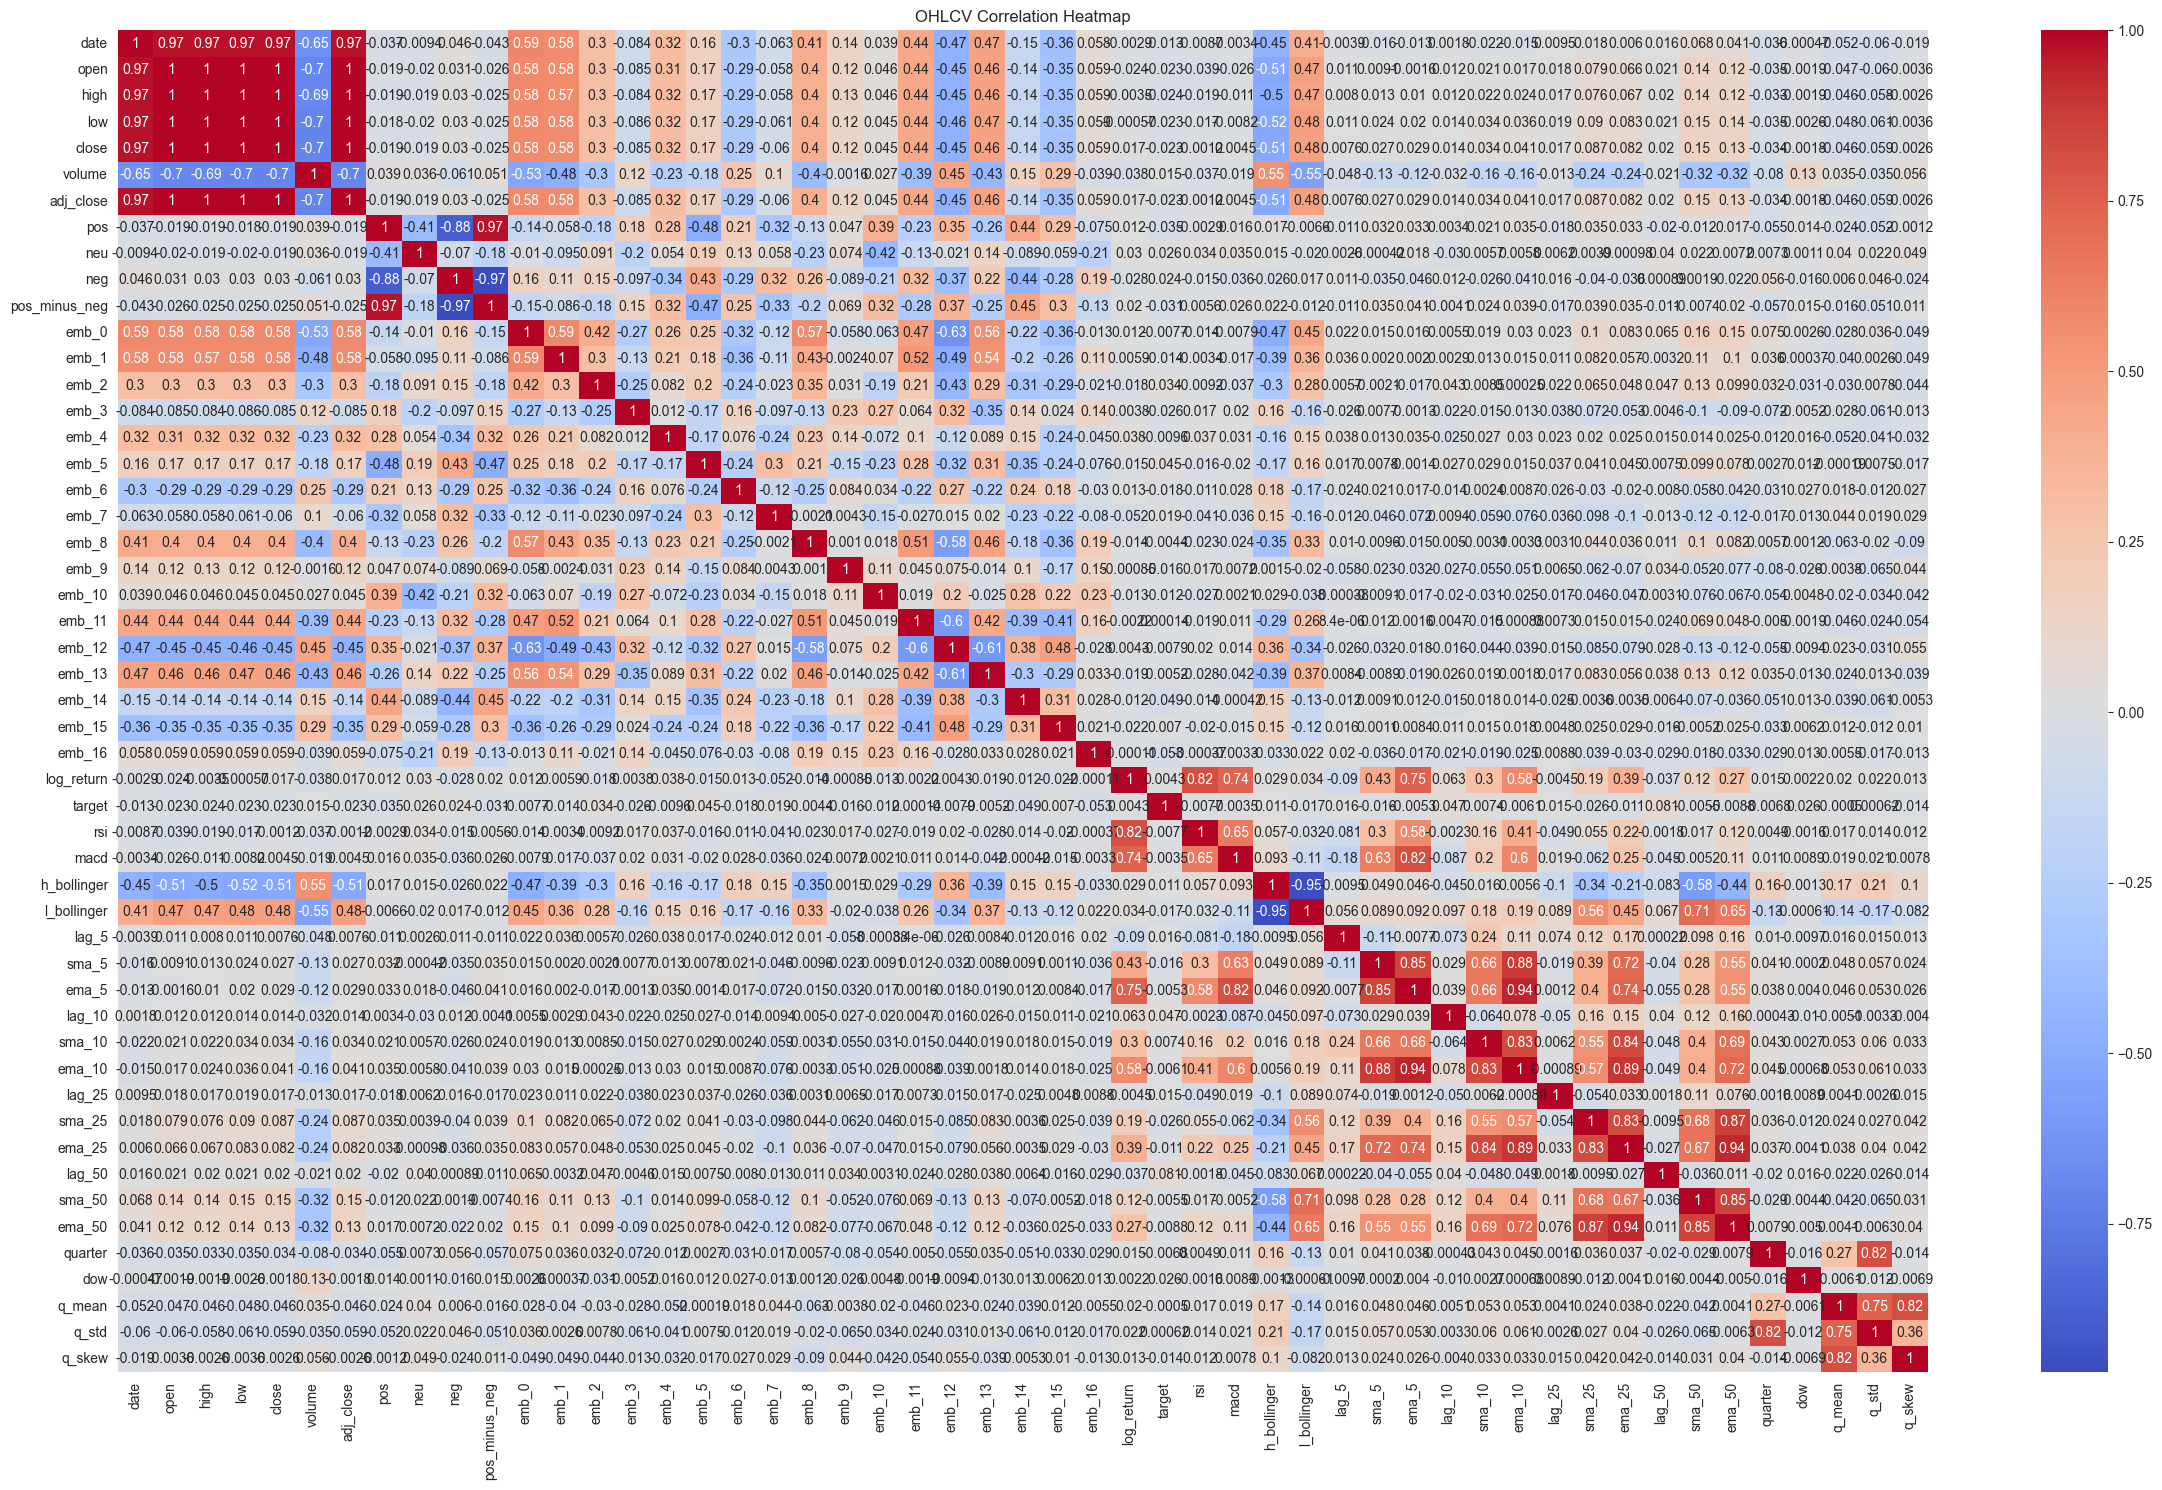

In [7]:
plot_correlation_heatmap(df_full, df_full.columns.tolist(), cfg.data.fig_dir, "full_correlation_heatmap.png", figsize = (24, 15))